<a href="https://colab.research.google.com/github/basha-dev-coder/Machinelearning/blob/main/NN_Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.8.2'

In [7]:
minst_data = keras.datasets.mnist
(X_train,y_train),(X_test,y_test) = minst_data.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
X_train.shape , y_train.shape

((60000, 28, 28), (60000,))

In [8]:
X_valid_norm,X_train_norm = X_train[:5000]/255.0 , X_train[5000:]/255.0
y_valid_norm,y_train_norm = y_train[:5000] , y_train[5000:]

In [ ]:
X_train_norm.shape , X_valid_norm.shape

((55000, 28, 28), (5000, 28, 28))

In [9]:
classnames = ["t-shirt","Trouser","Pullover","Dress","coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [9]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=[28,28],name="input"),
        keras.layers.Dense(50,activation="relu",name="hidden_1"),
        keras.layers.Dense(30,activation="relu",name="hidden_2"),
        keras.layers.Dense(10,activation="softmax",name="output"),                  
])


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 hidden_1 (Dense)            (None, 50)                39250     
                                                                 
 hidden_2 (Dense)            (None, 30)                1530      
                                                                 
 output (Dense)              (None, 10)                310       
                                                                 
Total params: 41,090
Trainable params: 41,090
Non-trainable params: 0
_________________________________________________________________


In [ ]:
for _ in model.layers:
  # print(_.name,_.get_weights())
  print(_.name,_.get_weights())

input []
hidden_1 [array([[ 0.08402926, -0.04137377,  0.00619677, ...,  0.06829139,
        -0.05617888, -0.00150291],
       [ 0.04845051, -0.05885828, -0.07820763, ..., -0.06488444,
         0.02594253,  0.02206312],
       [ 0.05726575, -0.07375424, -0.08190642, ...,  0.07334255,
         0.03639969, -0.08092347],
       ...,
       [ 0.05702161, -0.01542162,  0.07253528, ..., -0.01333158,
        -0.06623325, -0.08105621],
       [ 0.03236276,  0.00931787, -0.04553356, ...,  0.00949314,
        -0.03615658,  0.01391048],
       [-0.04034753, -0.06460911, -0.0372551 , ...,  0.03723194,
         0.05830159, -0.04865881]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)]
hidden_2 [array([[ 0.0045163 ,  0.11522961, -0.1993702 , ..., -0.06007196,
         0.23048061,  0.04115203]

In [11]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),metrics="accuracy",loss=keras.losses.SparseCategoricalCrossentropy())

In [12]:
history_simple_model = model.fit(X_train_norm,y_train_norm,validation_data=(X_valid_norm,y_valid_norm),batch_size=32,epochs=10,verbose=1)

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7073 - accuracy: 0.8080 - val_loss: 0.3326 - val_accuracy: 0.9100
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3157 - accuracy: 0.9094 - val_loss: 0.2624 - val_accuracy: 0.9248
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2645 - accuracy: 0.9234 - val_loss: 0.2280 - val_accuracy: 0.9336
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2330 - accuracy: 0.9327 - val_loss: 0.2051 - val_accuracy: 0.9408
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2098 - accuracy: 0.9398 - val_loss: 0.1942 - val_accuracy: 0.9458
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1917 - accuracy: 0.9446 - val_loss: 0.1760 - val_accuracy: 0.9498
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1766 - accuracy: 0.9495 - val_loss: 0.1670 - val_accuracy:

In [ ]:
history_simple_model.params , history_simple_model.history

({'epochs': 10, 'steps': 1719, 'verbose': 1},
 {'accuracy': [0.9742727279663086,
   0.97447270154953,
   0.9761454463005066,
   0.9771636128425598,
   0.9784908890724182,
   0.9780363440513611,
   0.9796545505523682,
   0.9806363582611084,
   0.981072723865509,
   0.9820727109909058],
  'loss': [0.08955422788858414,
   0.08622279763221741,
   0.08285588771104813,
   0.07988772541284561,
   0.07608716934919357,
   0.07415244728326797,
   0.07131066173315048,
   0.06858698278665543,
   0.066391222178936,
   0.06380446255207062],
  'val_accuracy': [0.97079998254776,
   0.9685999751091003,
   0.9703999757766724,
   0.9703999757766724,
   0.9703999757766724,
   0.9711999893188477,
   0.9706000089645386,
   0.9721999764442444,
   0.9729999899864197,
   0.9721999764442444],
  'val_loss': [0.09845734387636185,
   0.10040672868490219,
   0.09716294705867767,
   0.0943528562784195,
   0.09450938552618027,
   0.0917443335056305,
   0.09410440921783447,
   0.08852013200521469,
   0.089317411184310

In [10]:
import pandas as pd
import plotly.express as plx
import plotly.graph_objects as go
def plot_history(history):
  history_data = pd.DataFrame(history.history)
  fig = plx.line(history_data,y=["loss","accuracy","val_loss","val_accuracy"],x=history.epoch)
  fig.show()

marker_data = dict(
            size=5,
            line=dict(
                color='DarkSlateGrey',
                width=2
            )
        )

def compare_history(history1,history2):
  fig = go.Figure()
 
  history_data_1 = pd.DataFrame(history1.history)
  history_data_1['epoch'] = history1.epoch
  history_data_2 = pd.DataFrame(history2.history)
  history_data_2['epoch'] = history2.epoch
  histories = {'history_1':history_data_1,'history_2':history_data_2}

  for history in histories:
    fig.add_trace(go.Scatter(x = histories[history].epoch,
                                   y = histories[history]["loss"], 
                                   name = history+" loss",marker=marker_data))
    fig.add_trace(go.Scatter(x = histories[history].epoch,
                                   y = histories[history]["accuracy"], 
                                   name = history+" accuracy",marker=marker_data))
    fig.add_trace(go.Scatter(x = histories[history].epoch,
                                   y = histories[history]["val_loss"], 
                                   name = history+" val_loss",marker=marker_data))
    fig.add_trace(go.Scatter(x = histories[history].epoch,
                                   y = histories[history]["val_accuracy"], 
                                   name = history+" val_accuracy",marker=marker_data))
    # plx.line(history_data_1,y[history]=["loss","accuracy","val_loss","val_accuracy"],x=history.epoch)
  fig.show()

In [ ]:
plot_history(history_simple_model)

In [ ]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001),metrics="accuracy",loss=keras.losses.SparseCategoricalCrossentropy())
history_updated_lr_model = model.fit(X_train_norm,y_train_norm,validation_data=(X_valid_norm,y_valid_norm),batch_size=32,epochs=10,verbose=1)

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0577 - accuracy: 0.9845 - val_loss: 0.0874 - val_accuracy: 0.9712
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0567 - accuracy: 0.9850 - val_loss: 0.0861 - val_accuracy: 0.9718
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0564 - accuracy: 0.9851 - val_loss: 0.0862 - val_accuracy: 0.9726
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0561 - accuracy: 0.9851 - val_loss: 0.0862 - val_accuracy: 0.9718
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0559 - accuracy: 0.9855 - val_loss: 0.0861 - val_accuracy: 0.9730
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0556 - accuracy: 0.9855 - val_loss: 0.0855 - val_accuracy: 0.9716
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0554 - accuracy: 0.9856 - val_loss: 0.0862 - val_accuracy:

In [ ]:
history_updated_lr_model.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
# compare_history(history_simple_model,history_updated_lr_model)

plot_history(history_updated_lr_model)

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 18.4113 - accuracy: 0.9663


[18.411266326904297, 0.9663000106811523]

In [ ]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001),metrics="accuracy",loss=keras.losses.SparseCategoricalCrossentropy())
history_updated_epoch_model = model.fit(X_train_norm,y_train_norm,validation_data=(X_valid_norm,y_valid_norm),batch_size=32,epochs=30,verbose=1)

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0545 - accuracy: 0.9858 - val_loss: 0.0853 - val_accuracy: 0.9724
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0543 - accuracy: 0.9858 - val_loss: 0.0849 - val_accuracy: 0.9724
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0541 - accuracy: 0.9858 - val_loss: 0.0850 - val_accuracy: 0.9724
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0540 - accuracy: 0.9859 - val_loss: 0.0853 - val_accuracy: 0.9736
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0537 - accuracy: 0.9862 - val_loss: 0.0857 - val_accuracy: 0.9722
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0535 - accuracy: 0.9862 - val_loss: 0.0851 - val_accuracy: 0.9718
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0533 - accuracy: 0.9862 - val_loss: 0.0849 - val_accuracy:

In [ ]:
plot_history(history_updated_epoch_model)

In [ ]:
model_updated_neurons = keras.Sequential([
        keras.layers.Flatten(input_shape=[28,28],name="input"),
        keras.layers.Dense(300,activation="relu",name="hidden_1"),
        keras.layers.Dense(100,activation="relu",name="hidden_2"),
        keras.layers.Dense(10,activation="softmax",name="output"),                  
])

In [ ]:
model_updated_neurons.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001),metrics="accuracy",loss=keras.losses.SparseCategoricalCrossentropy())
history_updated_neurons_model = model_updated_neurons.fit(X_train_norm,y_train_norm,validation_data=(X_valid_norm,y_valid_norm),batch_size=32,epochs=30,verbose=1)

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 1.7042 - accuracy: 0.5615 - val_loss: 1.1341 - val_accuracy: 0.7854
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.8622 - accuracy: 0.8215 - val_loss: 0.6561 - val_accuracy: 0.8546
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5850 - accuracy: 0.8596 - val_loss: 0.5009 - val_accuracy: 0.8812
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4782 - accuracy: 0.8771 - val_loss: 0.4264 - val_accuracy: 0.8950
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4224 - accuracy: 0.8872 - val_loss: 0.3837 - val_accuracy: 0.9030
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3877 - accuracy: 0.8944 - val_loss: 0.3552 - val_accuracy: 0.9068
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3633 - accuracy: 0.8990 - val_loss: 0.3353 - val_accuracy:

In [ ]:
plot_history(history_updated_neurons_model)

In [ ]:
import random
fig = plx.imshow(X_train_norm[random.randint(0,len(X_train_norm))])
fig.show()

In [101]:
X_train_norm[0].shape

(28, 28)

In [ ]:
model_less_lr = keras.Sequential([
        keras.layers.Flatten(input_shape=[28,28],name="input"),
        keras.layers.Dense(300,activation="relu",name="hidden_1"),
        keras.layers.Dense(100,activation="relu",name="hidden_2"),
        keras.layers.Dense(10,activation="softmax",name="output"),                  
])

In [ ]:
model_less_lr.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),metrics="accuracy",loss=keras.losses.SparseCategoricalCrossentropy())
history_less_lr_model = model_less_lr.fit(X_train_norm,y_train_norm,validation_data=(X_valid_norm,y_valid_norm),batch_size=32,epochs=30,verbose=1)

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6077 - accuracy: 0.8430 - val_loss: 0.3099 - val_accuracy: 0.9140
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2885 - accuracy: 0.9189 - val_loss: 0.2402 - val_accuracy: 0.9342
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2350 - accuracy: 0.9333 - val_loss: 0.2017 - val_accuracy: 0.9460
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1996 - accuracy: 0.9436 - val_loss: 0.1726 - val_accuracy: 0.9532
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1727 - accuracy: 0.9510 - val_loss: 0.1546 - val_accuracy: 0.9578
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1527 - accuracy: 0.9559 - val_loss: 0.1406 - val_accuracy: 0.9618
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1362 - accuracy: 0.9609 - val_loss: 0.1283 - val_accuracy:

In [ ]:
plot_history(history_less_lr_model)

In [ ]:
class Mymodel(keras.Model):
  def __init__(self,activation="relu",**kwargs):
    super().__init__(**kwargs)
    self.flatten = keras.layers.Flatten()
    self.d1 = keras.layers.Dense(300,activation=activation)
    self.d2 = keras.layers.Dense(100,activation=activation)
    self.d3 = keras.layers.Dense(10,activation="softmax")
  
  def call(self,x):
    print(x.shape)
    flatten = self.flatten(x)
    d1 = self.d1(flatten)
    d2 = self.d2(d1)
    d3 = self.d3(d2)
    return d3

In [ ]:
model_mine = Mymodel()

In [ ]:
model_mine.build(input_shape=[28,28])
model_mine.summary()

(28, 28)
Model: "mymodel_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         multiple                  0         
                                                                 
 dense_3 (Dense)             multiple                  8700      
                                                                 
 dense_4 (Dense)             multiple                  30100     
                                                                 
 dense_5 (Dense)             multiple                  1010      
                                                                 
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


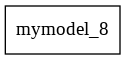

In [ ]:
keras.utils.plot_model(model_mine) # plot model method will not work for Subclass API

In [ ]:
model_mine.layers[1].get_weights()[1].shape

(300,)

In [ ]:
model_mine.compile(optimizer = keras.optimizers.SGD(learning_rate=0.01),loss=keras.losses.SparseCategoricalCrossentropy,metrics=["accuracy"])

In [ ]:
# NEED TO UNDERSTAND HOW TO FIT THE MODEL FOR SUBCLASS API
# history_subclass = model_mine.fit(X_train_norm,y_train_norm,validation_data=(X_valid_norm,y_valid_norm),epochs=30)

In [ ]:
X_train_norm.reshape([-1,1]).shape


(43120000, 1)

In [ ]:
28*28*55000

43120000

In [11]:
def add_gaussian_noise(image):
    # image must be scaled in [0, 1]
    with tf.name_scope('Add_gaussian_noise'):
        noise = tf.random.normal(shape=tf.shape(image), mean=0.0, stddev=(50)/(255), dtype=tf.float32)
        noise_img = image + noise
        noise_img = tf.clip_by_value(noise_img, 0.0, 1.0)
    return noise_img

In [12]:

X_valid_norm_noise = X_valid_norm.copy()
for index,image in enumerate(X_valid_norm_noise):
  X_valid_norm_noise[index] = add_gaussian_noise(image)

In [ ]:
image_number = 100
fig = plx.imshow(X_valid_norm_noise[image_number])
fig.show()

In [ ]:
fig = plx.imshow(X_valid_norm[image_number])
fig.show()

In [ ]:
fig = plx.imshow(X_train[image_number])
fig.show()

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor="val_loss",patience=5)

model_less_lr.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),metrics="accuracy",loss=keras.losses.SparseCategoricalCrossentropy())

history_noise_image_model = model_less_lr.fit(X_train_norm,y_train_norm,validation_data=(X_valid_norm_noise,y_valid_norm),batch_size=32,epochs=30,callbacks=[callback])


Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0069 - accuracy: 0.9995 - val_loss: 0.3355 - val_accuracy: 0.8904
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0067 - accuracy: 0.9996 - val_loss: 0.3475 - val_accuracy: 0.8864
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0064 - accuracy: 0.9997 - val_loss: 0.3312 - val_accuracy: 0.8916
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0062 - accuracy: 0.9997 - val_loss: 0.3148 - val_accuracy: 0.8994
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0059 - accuracy: 0.9997 - val_loss: 0.3294 - val_accuracy: 0.8960
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0057 - accuracy: 0.9998 - val_loss: 0.3381 - val_accuracy: 0.8922
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0056 - accuracy: 0.9997 - val_loss: 0.3514 - val_accuracy:

In [ ]:
plot_history(history_noise_image_model)

In [ ]:
from numpy import exp
def lr_Scheduler(epoch,lr):
  if epoch <= 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

lr_callback = tf.keras.callbacks.LearningRateScheduler(
    lr_Scheduler, verbose=1)

early_callback = keras.callbacks.EarlyStopping(monitor="val_loss",patience=7)

model_less_lr.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),metrics="accuracy",loss=keras.losses.SparseCategoricalCrossentropy())

history_noise_image_model = model_less_lr.fit(X_train_norm,y_train_norm,validation_data=(X_valid_norm_noise,y_valid_norm),batch_size=32,epochs=30,callbacks=[early_callback,lr_callback])



Epoch 1: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 2.3013 - accuracy: 0.1123 - val_loss: 2.3009 - val_accuracy: 0.1126 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 2.3013 - accuracy: 0.1123 - val_loss: 2.3008 - val_accuracy: 0.1126 - lr: 0.0100

Epoch 3: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 2.3013 - accuracy: 0.1123 - val_loss: 2.3009 - val_accuracy: 0.1126 - lr: 0.0100

Epoch 4: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 2.3013 - accuracy: 0.1123 - val_loss: 2.3010 - val_accuracy: 0.1126 - lr: 0.0100

Epoch 5: LearningRateScheduler setting learning rate to

In [ ]:
lr = 0.01
for epoch in range(1,30):
  if epoch <= 10:
    pass
  else:
    lr = lr * tf.math.exp(-0.1)
  print(lr)

0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
tf.Tensor(0.009048374, shape=(), dtype=float32)
tf.Tensor(0.008187308, shape=(), dtype=float32)
tf.Tensor(0.0074081826, shape=(), dtype=float32)
tf.Tensor(0.0067032008, shape=(), dtype=float32)
tf.Tensor(0.0060653067, shape=(), dtype=float32)
tf.Tensor(0.0054881168, shape=(), dtype=float32)
tf.Tensor(0.0049658534, shape=(), dtype=float32)
tf.Tensor(0.00449329, shape=(), dtype=float32)
tf.Tensor(0.004065697, shape=(), dtype=float32)
tf.Tensor(0.003678795, shape=(), dtype=float32)
tf.Tensor(0.0033287113, shape=(), dtype=float32)
tf.Tensor(0.0030119426, shape=(), dtype=float32)
tf.Tensor(0.0027253183, shape=(), dtype=float32)
tf.Tensor(0.00246597, shape=(), dtype=float32)
tf.Tensor(0.002231302, shape=(), dtype=float32)
tf.Tensor(0.0020189655, shape=(), dtype=float32)
tf.Tensor(0.0018268356, shape=(), dtype=float32)
tf.Tensor(0.0016529892, shape=(), dtype=float32)
tf.Tensor(0.0014956865, shape=(), dtype=float32)


In [ ]:
progbar_callback = keras.callbacks.ProgbarLogger(count_mode="samples",stateful_metrics="loss")
history_noise_image_model = model_less_lr.fit(X_train_norm,y_train_norm,validation_data=(X_valid_norm_noise,y_valid_norm),batch_size=32,epochs=30,callbacks=[early_callback,progbar_callback])

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/sample - loss: 2.3013 - accuracy: 0.1123 - val_loss: 2.3009 - val_accuracy: 0.1126
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/sample - loss: 2.3013 - accuracy: 0.1123 - val_loss: 2.3009 - val_accuracy: 0.1126
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/sample - loss: 2.3013 - accuracy: 0.1123 - val_loss: 2.3010 - val_accuracy: 0.1126
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/sample - loss: 2.3013 - accuracy: 0.1123 - val_loss: 2.3009 - val_accuracy: 0.1126
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/sample - loss: 2.3013 - accuracy: 0.1123 - val_loss: 2.3009 - val_accuracy: 0.1126
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/sample - loss: 2.3013 - accuracy: 0.1123 - val_loss: 2.3009 - val_accuracy: 0.1126
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/sample - loss: 2.3013 - accuracy: 0.1123 - val_loss: 2.3009 -

In [ ]:
progbar_callback = keras.callbacks.ProgbarLogger(count_mode="steps",stateful_metrics="val_loss")
history_noise_image_model = model_less_lr.fit(X_train_norm,y_train_norm,validation_data=(X_valid_norm_noise,y_valid_norm),batch_size=32,epochs=30,callbacks=[early_callback,progbar_callback])

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 2.3013 - accuracy: 0.1123 - val_loss: 2.3008 - val_accuracy: 0.1126
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 2.3013 - accuracy: 0.1123 - val_loss: 2.3009 - val_accuracy: 0.1126
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 2.3013 - accuracy: 0.1123 - val_loss: 2.3009 - val_accuracy: 0.1126
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 2.3013 - accuracy: 0.1123 - val_loss: 2.3009 - val_accuracy: 0.1126
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 2.3013 - accuracy: 0.1123 - val_loss: 2.3009 - val_accuracy: 0.1126
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 2.3013 - accuracy: 0.1123 - val_loss: 2.3009 - val_accuracy: 0.1126
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 2.3013 - accuracy: 0.1123 - val_loss: 2.3009 - val_accuracy:

In [15]:

model_updating_lr = keras.Sequential([
        keras.layers.Flatten(input_shape=[28,28],name="input"),
        keras.layers.Dense(300,activation="relu",name="hidden_1"),
        keras.layers.Dense(100,activation="relu",name="hidden_2"),
        keras.layers.Dense(10,activation="softmax",name="output"),                  
])
model_updating_lr.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),metrics="accuracy",loss=keras.losses.SparseCategoricalCrossentropy())
reduce_lr_callback = keras.callbacks.ReduceLROnPlateau(monitor="val_loss",patience=5,factor=0.01,)
progbar_callback = keras.callbacks.ProgbarLogger(count_mode="steps",stateful_metrics="val_loss")
history_updating_lr_model = model_updating_lr.fit(X_train_norm,y_train_norm,validation_data=(X_valid_norm_noise,y_valid_norm),batch_size=32,epochs=30,callbacks=[reduce_lr_callback,progbar_callback])

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6241 - accuracy: 0.8373 - val_loss: 0.4178 - val_accuracy: 0.8862 - lr: 0.0100
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2889 - accuracy: 0.9176 - val_loss: 0.3532 - val_accuracy: 0.9064 - lr: 0.0100
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2357 - accuracy: 0.9328 - val_loss: 0.3379 - val_accuracy: 0.9114 - lr: 0.0100
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2010 - accuracy: 0.9426 - val_loss: 0.3243 - val_accuracy: 0.9122 - lr: 0.0100
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1752 - accuracy: 0.9500 - val_loss: 0.3242 - val_accuracy: 0.9072 - lr: 0.0100
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1546 - accuracy: 0.9559 - val_loss: 0.3055 - val_accuracy: 0.9116 - lr: 0.0100
Epoch 7/30
1719/1719 [==============================] - 5s

In [19]:
model_updating_lr.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),metrics="accuracy",loss=keras.losses.SparseCategoricalCrossentropy())
reduce_lr_callback = keras.callbacks.ReduceLROnPlateau(monitor="val_loss",patience=5,factor=0.1,)
progbar_callback = keras.callbacks.ProgbarLogger(count_mode="steps",stateful_metrics="val_loss")
history_updating_lr_model = model_updating_lr.fit(X_train_norm,y_train_norm,validation_data=(X_valid_norm_noise,y_valid_norm),batch_size=32,epochs=30,callbacks=[reduce_lr_callback,progbar_callback])

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5949 - accuracy: 0.8459 - val_loss: 0.4014 - val_accuracy: 0.8970 - lr: 0.0100
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2886 - accuracy: 0.9188 - val_loss: 0.3378 - val_accuracy: 0.9092 - lr: 0.0100
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2374 - accuracy: 0.9324 - val_loss: 0.3185 - val_accuracy: 0.9172 - lr: 0.0100
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2030 - accuracy: 0.9427 - val_loss: 0.2957 - val_accuracy: 0.9220 - lr: 0.0100
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1775 - accuracy: 0.9498 - val_loss: 0.2647 - val_accuracy: 0.9332 - lr: 0.0100
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1576 - accuracy: 0.9550 - val_loss: 0.2634 - val_accuracy: 0.9314 - lr: 0.0100
Epoch 7/30
1719/1719 [==============================] - 6s

In [18]:
model_updating_lr = keras.Sequential([
        keras.layers.Flatten(input_shape=[28,28],name="input"),
        keras.layers.Dense(300,activation="relu",name="hidden_1"),
        keras.layers.Dense(100,activation="relu",name="hidden_2"),
        keras.layers.Dense(10,activation="softmax",name="output"),                  
])
model_updating_lr.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001),metrics="accuracy",loss=keras.losses.SparseCategoricalCrossentropy())

# progbar_callback = keras.callbacks.ProgbarLogger(count_mode="steps",stateful_metrics="val_loss")
history_updating_lr_model = model_updating_lr.fit(X_train_norm,y_train_norm,validation_data=(X_valid_norm_noise,y_valid_norm),batch_size=32,epochs=30,callbacks=[reduce_lr_callback,progbar_callback])

NameError: ignored

<dtype: 'uint8'>


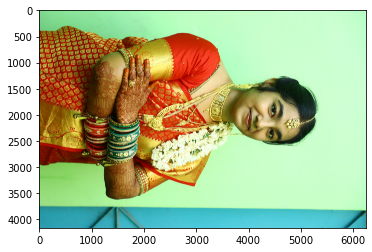

In [28]:
# fig = plx.imshow("IMG_6013.JPG")
# fig.show()

from tensorflow import io
from tensorflow import image
from matplotlib import pyplot as plt
 
# filterwarnings("ignore") 
tf_img = io.read_file("IMG_6013.JPG")
tf_img = image.decode_png(tf_img, channels=3)
print(tf_img.dtype)
plt.imshow(tf_img)

In [135]:
from PIL import Image 
import os 
import PIL 
import glob 
#To use shorter file names in our system, we should prefer OS and Glob modules. It is used to change, save and open images with PIL to PIL image or different optimization options. 
from typeguard import typechecked
#typeguard is to check the type of argument is passing to a function

@typechecked
def image_reshaping(filename:str,shape:list=[28,28]):
  image = Image.open("IMG_6013.JPG").convert("L") # L means RGB color will be lost(2D) [181, 183, 185, ..] , RGB(3D) will have R,G,B values[[129, 215, 144]
  print(image.size) 
  resized_image = image.resize(shape) 
  print(resized_image.size)
  return resized_image


#Source: How to Resize an Image in Python (+ Examples) - Dopinger (https://blog.dopinger.com/how-to-resize-an-image-in-python)

In [144]:
import numpy as np
image_data = np.array((image_reshaping("",shape=[128, 128])))
fig = plx.imshow(image_data)
fig.show()

(6240, 4160)
(128, 128)


In [124]:
noisy_aabi = add_gaussian_noise(image_data/255.)
fig = plx.imshow(noisy_aabi)
fig.show()

In [145]:
compare_history(history_updating_lr_model,history_simple_model)

In [ ]:
!pip install wandb

In [150]:
import wandb
from wandb.keras import WandbCallback
wandb.login()

wandb.init(project="NN Basics Playground")

wandb: Currently logged in as: basha. Use `wandb login --relogin` to force relogin


In [152]:

model_updating_lr = keras.Sequential([
        keras.layers.Flatten(input_shape=[28,28],name="input"),
        keras.layers.Dense(300,activation="relu",name="hidden_1"),
        keras.layers.Dense(100,activation="relu",name="hidden_2"),
        keras.layers.Dense(10,activation="softmax",name="output"),                  
])
model_updating_lr.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001),metrics="accuracy",loss=keras.losses.SparseCategoricalCrossentropy())

# progbar_callback = keras.callbacks.ProgbarLogger(count_mode="steps",stateful_metrics="val_loss")
history_updating_lr_model = model_updating_lr.fit(X_train_norm,y_train_norm,validation_data=(X_valid_norm_noise,y_valid_norm),batch_size=32,epochs=30,callbacks=[reduce_lr_callback,progbar_callback,WandbCallback()])

wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 1.7633 - accuracy: 0.5447 - val_loss: 1.3182 - val_accuracy: 0.7472 - lr: 0.0010
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8952 - accuracy: 0.8143 - val_loss: 0.7950 - val_accuracy: 0.8280 - lr: 0.0010
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6011 - accuracy: 0.8558 - val_loss: 0.6190 - val_accuracy: 0.8552 - lr: 0.0010
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4930 - accuracy: 0.8739 - val_loss: 0.5388 - val_accuracy: 0.8706 - lr: 0.0010
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4364 - accuracy: 0.8846 - val_loss: 0.4891 - val_accuracy: 0.8796 - lr: 0.0010
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4005 - accuracy: 0.8918 - val_loss: 0.4575 - val_accuracy: 0.8836 - lr: 0.0010
Epoch 7/30
1719/1719 [==============================] - 5s

In [ ]:
metric = {
    "lr":0.01,
    "callbacks" : ["Learning rate","ReduceLRonPlateu,","Progressbar","Early Stopping"],
    "Batchsize" : [32,64]
}
wandb.config(metric)

In [ ]:
# We can use Arguments parser module to pass and log env variables
api = wandb.Api()
run = api.run("basha/NN Playground/<<run_id>>")
run.config["lr"] = 0.001
run.update()

In [ ]:
wandb.log(metric)
wandb.log({'loss':0.20},step=4)

In [ ]:

# Define the custom x axis metric
wandb.define_metric("my_metric")

wandb.define_metric("validation/loss",step_metric="my_metric")
for i in range(10):
  log_dict = {
      "train/loss": 1/(i+1),
      "my_metric": i**2,
      "validation/loss": 1/(i+1)   
  }
  wandb.log(log_dict)

# Use this in the context of a jupyter notebook to mark a run finished
wandb.finish()

Run the cell above and click on the link that prints out to see the dashboard. It will look something like this:
- `train_loss` is plotted against the standard W&B internal step
- `custom_step` is plotted too, so you can see how it increases over the W&B internal step
- `validation_loss` is plotted against the `custom_step`, replacing the default with the x-axis as the W&B internal step


![](https://i.imgur.com/jGcoAIV.png)

In [ ]:
wandb.define_metric("accuracy",summary="max")
wandb.define_metric("loss",summary="loss")

# Simulate a training loop where we're logging metrics
for i in range(10):
  log_dict = {
      "loss": random.uniform(0,1/(i+1)),
      "acc": random.uniform(1/(i+1),1),
  }
  wandb.log(log_dict)

# Mark the run as finished, useful in the context of Jupyter notebooks
wandb.finish()

In [ ]:
path = "media path"
wandb.log({"img":[wandb.Image(path,caption="Example")]})
wandb.log({"video":[wandb.video(path,format="mp4")]})# we can set frame levels as well
wandb.log({"video":[wandb.Audio(path,format="mp3")]})# we can set frame levels as well
wandb.log({"custom_file":wandb.Html(open(path))})
wandb.log({"custom_file":wandb.Html("<a href="https://mysite">Link</a>")})
# can upload .csv file in W&B

In [ ]:
wandb.alert(title="Alerting a model performance",text="Can be customized with data <@username>",level="Info,Warn,Error")

In [10]:
import random
print(random.randint(-1, 1))

0


In [2]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 12.9 MB/s 
     |████████████████████████████████| 145 kB 33.1 MB/s 
     |████████████████████████████████| 181 kB 53.0 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=817a8145382919e36a0d6ad8cb35e877d2e6443806a9c149d4ce89fe3416122a
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [45]:
import wandb

sweep_config = {
  "name" : "my-sweep",
  "method" : "random",
  "parameters" : {
    "epochs" : {
      "values" : [10, 20, 50]
    },
    "learning_rate" :{
      "min": 0.0001,
      "max": 0.1
    }
  }
}

sweep_id = wandb.sweep(sweep_config)

Create sweep with ID: 3d7mjrsi
Sweep URL: https://wandb.ai/basha/uncategorized/sweeps/3d7mjrsi


In [27]:
sweep_id

'zmxkjbjl'

In [46]:
def make_model(config):
  model_updating_lr = keras.Sequential([
        keras.layers.Flatten(input_shape=[28,28],name="input"),
        keras.layers.Dense(300,activation="relu",name="hidden_1"),
        keras.layers.Dense(100,activation="relu",name="hidden_2"),
        keras.layers.Dense(10,activation="softmax",name="output"),                  
  ])
  model_updating_lr.compile(optimizer=keras.optimizers.SGD(learning_rate=config.learning_rate),metrics="accuracy",loss=keras.losses.SparseCategoricalCrossentropy())
  return model_updating_lr
# progbar_callback = keras.callbacks.ProgbarLogger(count_mode="steps",stateful_metrics="val_loss")
  

In [49]:
from wandb.keras import WandbCallback

In [50]:
def train():
    with wandb.init(project="Sweep Experiments",group="minst_data") as run:
        config = wandb.config
        model = make_model(config)
        for epoch in range(config["epochs"]):
            # loss = model.fit()  # your model training code here
            # print("epoch ", config["epochs"])
            loss = model.fit(X_train_norm,y_train_norm,validation_data=(X_valid_norm_noise,y_valid_norm),batch_size=32,epochs=config["epochs"],callbacks=[WandbCallback()])
            print("loss ",loss.history)
            # wandb.log({"history":sum(loss.history["loss"])})
            wandb.log({"loss":sum(loss.history["loss"]) / len(loss.history["loss"]) , "epoch": config["epochs"]})


count = 5 # number of runs to execute


In [51]:
wandb.agent(sweep_id, function=train, count=count)
wandb.finish()

wandb: Agent Starting Run: pkg7475o with config:
wandb: 	epochs: 50
wandb: 	learning_rate: 0.08615489454069711
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2782 - accuracy: 0.9186 - val_loss: 0.2158 - val_accuracy: 0.9398 - _timestamp: 1655761286.0000 - _runtime: 11.0000
Epoch 2/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1162 - accuracy: 0.9651 - val_loss: 0.1900 - val_accuracy: 0.9464 - _timestamp: 1655761292.0000 - _runtime: 17.0000
Epoch 3/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0792 - accuracy: 0.9757 - val_loss: 0.1727 - val_accuracy: 0.9470 - _timestamp: 1655761298.0000 - _runtime: 23.0000
Epoch 4/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0572 - accuracy: 0.9824 - val_loss: 0.1325 - val_accuracy: 0.9616 - _timestamp: 1655761304.0000 - _runtime: 29.0000
Epoch 5/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0427 - accuracy: 0.9870 - val_loss: 0.1400 - val_accuracy: 0.9580 - _timestamp: 1655761310.0000 - _runtime: 35.0000
Epoch 6/50
1719/1719 [========

accuracy,▁▆██████████████████████████████████████
epoch,▁▂▃▄▅▆█▂▂▃▄▅▇█▂▃▃▅▆▇█▂▃▄▅▆▇█▂▃▄▅▆▇▁▂▃▄▅▇
loss,█▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▅▁█▇█▇▆▇▆▇▆▇▇▇▇▆▆▇▇▆▆▆▆▆▆▇▆▆▆▆▆▆▆▆▆▆▆▆▆▆
val_loss,▂▂▁▂▃▃▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇███████
accuracy,1.0
best_epoch,5
best_val_loss,0.11251
epoch,40
loss,2e-05
val_accuracy,0.9628


In [36]:
histry = {"history":{
    "loss":[0.01,0.02]
}}

In [23]:
sum(histry["history"]["loss"]) / len(histry["history"]["loss"])

0.015

In [25]:
(0.01+0.02) / 2

0.015

In [41]:
sum(histry.get("history").get("loss"))

0.03